# Dataset Visualizer

In [11]:
from dataset_loader import CLIPSet
from termcolor import cprint
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
data_path = "./data/train_final.pkl"

dataset = CLIPSet(pickle_file_path=data_path, visualize=True)

Pickle file exists. Loading from pickle file
Delay frame is : 30


In [13]:
print('length of dataset: ', len(dataset))

length of dataset:  3441


In [14]:
# index = random.randint(0, len(dataset) - dataset.delay - 1)
index = 0
cprint(f'index: {index}', color='green')

index: 0


In [15]:
lidar, joy = dataset[index]

In [16]:
joy_df = pd.DataFrame(data=joy, columns=[
                                      'linear_x', 'linear_y', 'angular_z'])
joy_df

,linear_x,linear_y,angular_z
0,1.6,0.0,-0.509057
1,1.6,0.0,-0.509057
2,1.6,0.0,-0.509057
3,1.6,0.0,-0.509057
4,1.6,0.0,-0.509057
...,...,...,...
295,1.6,0.0,0.285665
296,1.6,0.0,0.285665
297,1.6,0.0,0.285665
298,1.6,0.0,0.285665


In [17]:
linear_x_max = joy_df['linear_x'].max()
linear_x_min = joy_df['linear_y'].min()
linear_x_avg = joy_df['linear_x'].mean()

linear_y_max = joy_df['linear_y'].max()
linear_y_min = joy_df['linear_y'].min()
linear_y_avg = joy_df['linear_y'].mean()

angular_z_max = joy_df['angular_z'].max()
angular_z_min = joy_df['angular_z'].min()
angular_z_avg = joy_df['angular_z'].mean()

In [18]:
joy_stats = {"linear_x": [linear_x_max, linear_x_min, linear_x_avg], "linear_y": [
    linear_y_max, linear_y_min, linear_y_avg], "angular_z": [angular_z_max, angular_z_min, angular_z_avg]}

joy_stats_df = pd.DataFrame(data=joy_stats, columns=[
                            'linear_x', 'linear_y', 'angular_z'], index=['max', 'min', 'avg'])

joy_stats_df


,linear_x,linear_y,angular_z
max,1.6,0.0,0.285665
min,0.0,0.0,-0.521474
avg,1.6,0.0,-0.133215


In [19]:
print(type(lidar))

<class 'tuple'>


get index:  0 , actual index:  30


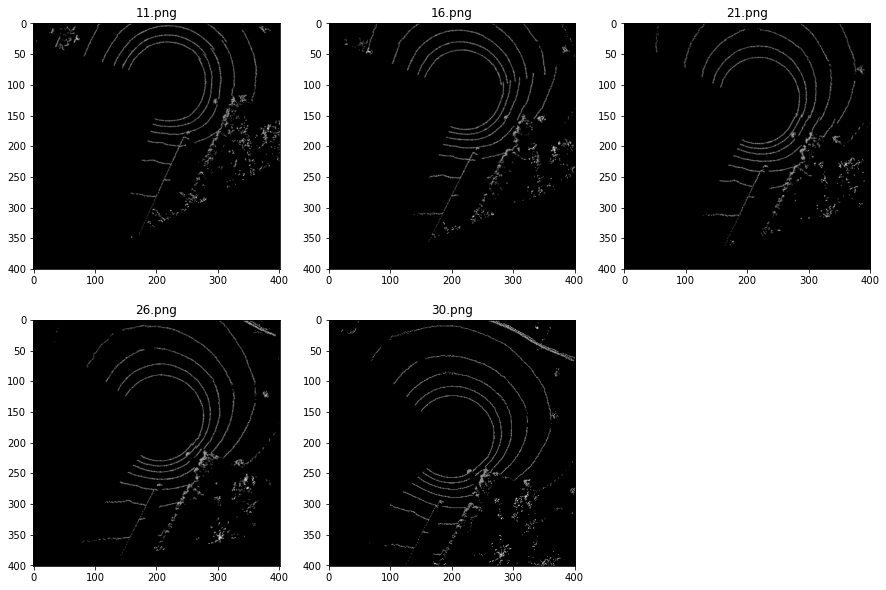

In [25]:
fig = plt.figure(figsize=(15, 10), num=index)
rows = 2
columns = 3

print('get index: ', index, ', actual index: ', index + dataset.delay)

lidar_imgs = lidar[0]
img_file_names = lidar[1]

fig.add_subplot(rows, columns, 1)
plt.imshow(lidar_imgs[0], cmap='gray')
plt.title(img_file_names[0])

fig.add_subplot(rows, columns, 2)
plt.imshow(lidar_imgs[1], cmap='gray')
plt.title(img_file_names[1])

fig.add_subplot(rows, columns, 3)
plt.imshow(lidar_imgs[2], cmap='gray')
plt.title(img_file_names[2])

fig.add_subplot(rows, columns, 4)
plt.imshow(lidar_imgs[3], cmap='gray')
plt.title(img_file_names[3])

fig.add_subplot(rows, columns, 5)
plt.imshow(lidar_imgs[4], cmap='gray')
plt.title(img_file_names[4]);
